<a href="https://colab.research.google.com/github/shivani-varsha/GST_hackathon/blob/main/GST_Randomforest_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [13]:

X = pd.read_csv('/content/drive/MyDrive/xtr.csv') # Dropping the target and any non-feature columns
y = pd.read_csv('/content/drive/MyDrive/ytr.csv')# The target column for binary classification

In [14]:
y.head()

,target
0,0
1,0
2,0
3,1
4,0


In [15]:
X.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.0,25.0,84.0,-2.028572,-1.855728,0.008567,-0.407939,-0.015607,-0.774979,-1.268666,...,0.0,0.0,0.001645,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2495.0,6316.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.125758,-0.509369,...,0.0,0.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2045.0,1328.0,0.678139,0.701403,-0.007467,-0.407939,-0.015607,1.037665,0.529205,...,1.0,1.0,0.001351,0.00339,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1223.0,-0.201167,-0.434121,-0.007468,-0.407939,-0.015607,-0.774979,-1.503788,...,0.0,0.0,0.001208,0.00339,0.0,1.0,2.0,0.0,0.0,0.0
4,0.0,881.0,5567.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-1.288306,...,0.0,0.0,0.001088,0.00339,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X.isnull().sum()

,0
Column0,0
Column1,0
Column2,0
Column3,0
Column4,0
Column5,0
Column6,0
Column7,0
Column8,0
Column9,0


In [17]:
# Random Forest Algorithm

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score (if you are interested in ROC curve performance)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC: {roc_auc:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 97.41%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21382
           1       0.83      0.91      0.87      2172

    accuracy                           0.97     23554
   macro avg       0.91      0.94      0.93     23554
weighted avg       0.98      0.97      0.97     23554

AUC-ROC: 0.99


In [18]:
# Test dataset
X_test_new = pd.read_csv('/content/drive/MyDrive/X_Test_Data_Input.csv')
X_test_new = X_test_new.drop('ID', axis=1)

Accuracy on new test set: 97.59%
Classification Report on new test set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.94      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.96      0.93    261712
weighted avg       0.98      0.98      0.98    261712

Precision: 0.83
Recall: 0.94
F1 Score: 0.88
AUC-ROC on new test set: 0.99
Confusion Matrix:
[[232187   4847]
 [  1465  23213]]


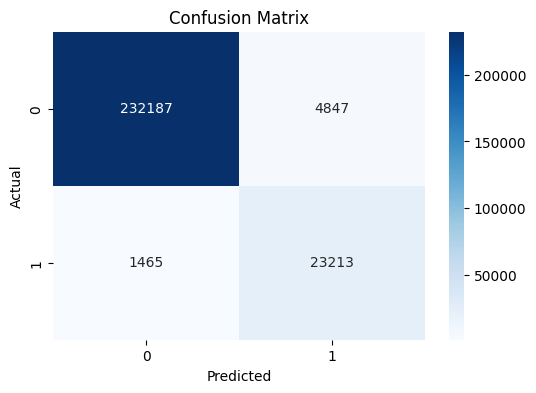

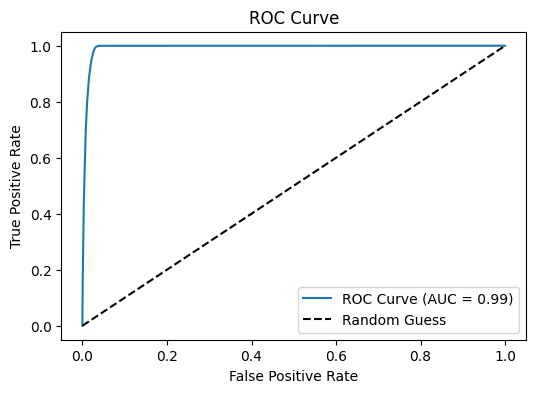

In [19]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Make predictions on the new test set
y_pred_new = model.predict(X_test_new)

# Load the true values of the test set
y_test_new = pd.read_csv('/content/drive/MyDrive/Y_Test_Data_Target.csv')
y_test_new = y_test_new['target']

# Step 2: Accuracy
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy on new test set: {accuracy_new * 100:.2f}%")

# Step 3: Precision, Recall, F1-Score, and Classification Report
print("Classification Report on new test set:")
print(classification_report(y_test_new, y_pred_new))

# Individual metrics: Precision, Recall, F1 Score
precision_new = precision_score(y_test_new, y_pred_new, average='binary')
recall_new = recall_score(y_test_new, y_pred_new, average='binary')
f1_new = f1_score(y_test_new, y_pred_new, average='binary')

print(f"Precision: {precision_new:.2f}")
print(f"Recall: {recall_new:.2f}")
print(f"F1 Score: {f1_new:.2f}")

# Step 4: AUC-ROC Score (for binary classification problems)
if len(set(y_test_new)) == 2:  # AUC is meaningful for binary classification
    roc_auc_new = roc_auc_score(y_test_new, model.predict_proba(X_test_new)[:, 1])
    print(f"AUC-ROC on new test set: {roc_auc_new:.2f}")

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test_new, y_pred_new)
print(f"Confusion Matrix:\n{cm}")

# Plot confusion matrix using seaborn heatmap for visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 6: ROC Curve
if len(set(y_test_new)) == 2:  # ROC curve is meaningful for binary classification
    fpr, tpr, thresholds = roc_curve(y_test_new, model.predict_proba(X_test_new)[:, 1])

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_new:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


In [20]:
# XG Boost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model

model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

if len(set(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"AUC-ROC: {roc_auc:.2f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:59:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 97.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14261
           1       0.83      0.92      0.87      1442

    accuracy                           0.97     15703
   macro avg       0.91      0.95      0.93     15703
weighted avg       0.98      0.97      0.98     15703



Accuracy on new test set: 97.45%
Classification Report on new test set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.81      0.96      0.88     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.97      0.93    261712
weighted avg       0.98      0.97      0.98    261712

Precision: 0.81
Recall: 0.96
F1 Score: 0.88
AUC-ROC on new test set: 0.99
Confusion Matrix:
[[231316   5718]
 [   960  23718]]


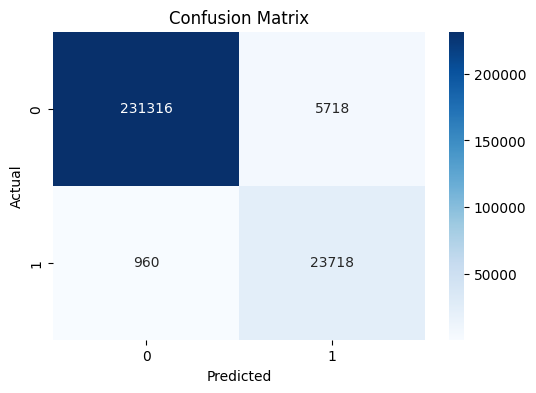

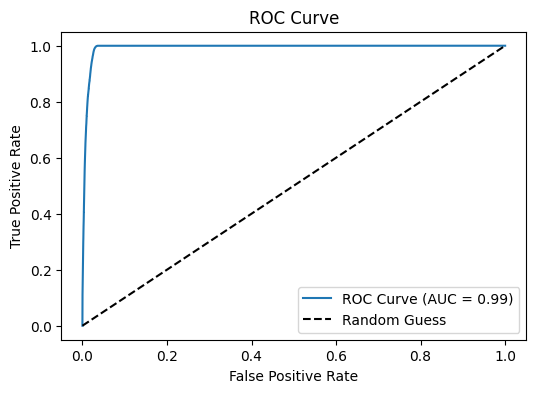

In [21]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_new = model.predict(X_test_new)

y_test_new = pd.read_csv('/content/drive/MyDrive/Y_Test_Data_Target.csv')
y_test_new = y_test_new['target']

accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"Accuracy on new test set: {accuracy_new * 100:.2f}%")


print("Classification Report on new test set:")
print(classification_report(y_test_new, y_pred_new))

precision_new = precision_score(y_test_new, y_pred_new, average='binary')
recall_new = recall_score(y_test_new, y_pred_new, average='binary')
f1_new = f1_score(y_test_new, y_pred_new, average='binary')

print(f"Precision: {precision_new:.2f}")
print(f"Recall: {recall_new:.2f}")
print(f"F1 Score: {f1_new:.2f}")

if len(set(y_test_new)) == 2:
    roc_auc_new = roc_auc_score(y_test_new, model.predict_proba(X_test_new)[:, 1])
    print(f"AUC-ROC on new test set: {roc_auc_new:.2f}")

#  Confusion Matrix
cm = confusion_matrix(y_test_new, y_pred_new)
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
if len(set(y_test_new)) == 2:  # ROC curve is meaningful for binary classification
    fpr, tpr, thresholds = roc_curve(y_test_new, model.predict_proba(X_test_new)[:, 1])

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_new:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
